### Simulation Based Inference

#### Exercises Session 2

##### Lorenzo Consoli



Importing the objects and the necessary libraries

In [1]:
from MCPiEstimator.MCPiEstimator import *
from InversionSampler.InversionSampler import *
import matplotlib.pyplot as plt

##### Exercise 1

Estimate pi using the Monte Carlo method. Compute Squared error over a single simulation with sample size of 1000

Initializing object, running estimation and displaying results

In [2]:
sample_size = 1000
n_simulations = 1
pi_estimator = MCPiEstimator(
    sample_size = sample_size, 
    n_simulations = n_simulations
)
pi_estimator.fit()
pi_estimator.display_results()

MCPiEstimator:
	sample_size: 1000
	n_simulations: 1

	pi: 3.141592653589793
	pi_hat: 3.124
	mean_squared_error 0.00030950146033045675



##### Exercise 1.1

Repeat this experiment 10, 000 times to compute the mean squared error for sample sizes N = 250, 500, 750, 1000, 1250

In [3]:
n_simulations = 10000
sample_sizes = [
    250, 
    500, 
    750, 
    1000, 
    1250
]
estimators = [
    MCPiEstimator(
        n_simulations = n_simulations, 
        sample_size = sample_size
    )
    for sample_size in sample_sizes
]
for estimator in estimators:
    estimator.fit()
    estimator.display_results()

MCPiEstimator:
	sample_size: 250
	n_simulations: 10000

	pi: 3.141592653589793
	pi_hat: 3.1429024
	mean_squared_error 0.01073387390989905

MCPiEstimator:
	sample_size: 500
	n_simulations: 10000

	pi: 3.141592653589793
	pi_hat: 3.1419144
	mean_squared_error 0.0053935969933924825

MCPiEstimator:
	sample_size: 750
	n_simulations: 10000

	pi: 3.141592653589793
	pi_hat: 3.1421962666666667
	mean_squared_error 0.003646993917031018

MCPiEstimator:
	sample_size: 1000
	n_simulations: 10000

	pi: 3.141592653589793
	pi_hat: 3.1407584
	mean_squared_error 0.0026832632084920855

MCPiEstimator:
	sample_size: 1250
	n_simulations: 10000

	pi: 3.141592653589793
	pi_hat: 3.14073856
	mean_squared_error 0.0021743193009865257



##### Exercise 1.2

Verify that the root mean squared error (RMSE) decreases at the rate of $N^{1/2}$ (hint: plot log(RMSE) against log(N))

In [4]:
root_mean_squared_errors = [
    np.sqrt(estimator.mean_squared_error)
    for estimator in estimators
]
log_root_mean_squared_errors = [
    np.log(mse)
    for mse in root_mean_squared_errors
]
log_sample_sizes = [
    np.log(sample_size)
    for sample_size in sample_sizes
]

Text(0, 0.5, 'log_root_mean_squared_errors')

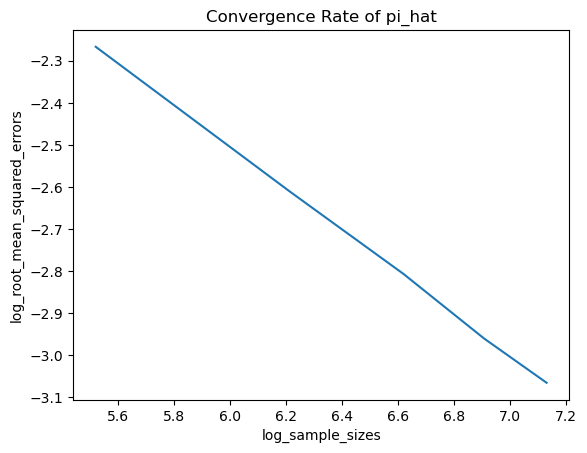

In [5]:
plt.plot(
    log_sample_sizes, 
    log_root_mean_squared_errors
)

plt.title('Convergence Rate of pi_hat')
plt.xlabel('log_sample_sizes')
plt.ylabel('log_root_mean_squared_errors')

As we can see there is a linear relationship between the two quantities. 
 
This means that:

* $log(RMSE) = \alpha + \beta * log(N)$

By taking the exponential of both sides we have:

* $RMSE = e^{\alpha}*N^{\beta}$

We can ignore the constant term $e^{\alpha}$ and rewrite: 

* $RMSE = c*N^{\beta}$

This means the the RMSE is a power function of the sample size N.

We can also observe from the plot that the slope of the line is approximately -0.5, as the $log(RMSE)$ decreases by almost one unit (from -2.3 to -3.1), while the $log(N)$ increases of almost 2 units (from 5.6 to 7.2).

This implies that, in the linear expression above (or, equivalently, in the exponential expression derived from it), $\beta$ is equal to -0.5. Thus, the convergence rate of the RMSE is of $\sqrt{N}$, if expressed in terms of N.

##### Exercise 2

Use the inversion method to obtain N = 100, 000 samples from an exponential distribution with rate parameter λ = 2

In [6]:
inv_exp_sampler = InverseExpSampler()
inv_exp_sampler.sample()

In [7]:
inv_exp_samples = inv_exp_sampler.samples
scale = 1 / inv_exp_sampler.rate
size = inv_exp_sampler.n_samples
n_bins = 1000

##### Exercise 2.1

Plot a histogram based on these samples

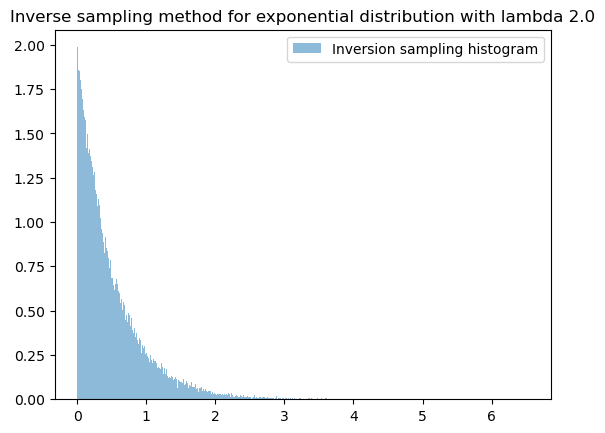

In [8]:
plt.hist(inv_exp_sampler.samples, bins = n_bins, density = True, alpha = 0.5, label = 'Inversion sampling histogram')
plt.title(f"Inverse sampling method for exponential distribution with lambda {inv_exp_sampler.rate}")
plt.legend()
plt.show()

##### Exercise 2.2

Overlay the exponential probability density function to verify that these samples are from the right distribution

In [9]:
exp_samples = np.random.exponential(scale=scale, size=size)

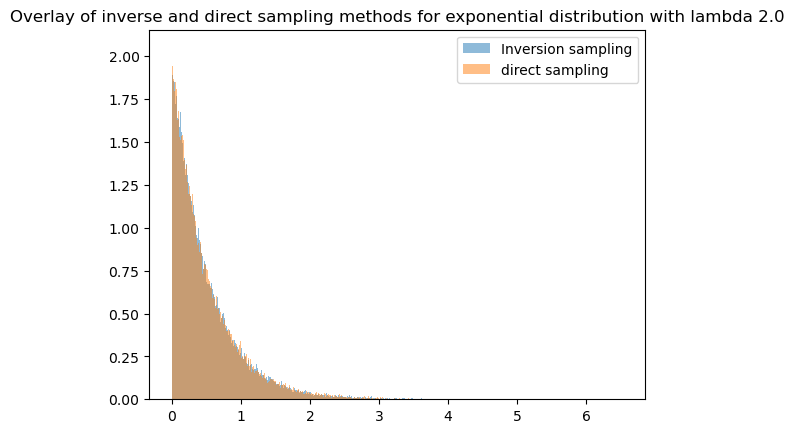

In [10]:
plt.hist(inv_exp_sampler.samples, bins = n_bins, density = True, alpha = 0.5, label = 'Inversion sampling')
plt.hist(exp_samples, bins=n_bins, density = True, alpha=0.5, label='direct sampling')
plt.title(f"Overlay of inverse and direct sampling methods for exponential distribution with lambda {inv_exp_sampler.rate}")
plt.legend()
plt.show()

As we can see from the overlaid histograms, the samples drawn through the inverse method roughly correspond to samples drawn from the target distribution, with some noise due to the randomness of the sampling